In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
epsilon = 1.

#epsilon = np.float64(epsilon)
epsilon = np.longdouble(epsilon)

while( 1. + epsilon != 1.):
    epsilon *= 0.5
    
print(epsilon)

5.42101086242752217e-20


In [3]:
def epsilon(x):
    return np.sin(x) - (x - (x**3)/6.)

In [4]:
x = 3*np.pi/4

print(x,epsilon(x))

# Ahora queremos reducir el valor en la mitad

(2.356194490192345, 0.5310411200777835)


In [5]:
print(x/2, epsilon(x/2))

(1.1780972450961724, 0.018298391050561857)


In [6]:
print(epsilon(x)/epsilon(x/2))

29.021192005921073


# Derivadas

In [7]:
def Function(x):
    return np.sin(x)

def ExactDerivative(x):
    return np.cos(x)

In [8]:
xi, xf, Npoints = 0.,2*np.pi, 200
h = (xf-xi)/float(Npoints)
print(h)

0.0314159265359


In [9]:
x = np.linspace(xi,xf,Npoints)

y = Function(x)
Dye = ExactDerivative(x)
#print(x)

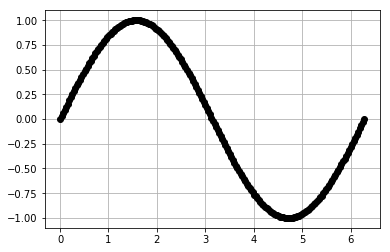

In [10]:
plt.plot(x,y,'ko')
plt.grid()

In [11]:
def RightDerivative(f,x,h):
    
    d = 0.
    
    if( h!=0):
        d = (f(x+h)-f(x))/h
        
    return d

In [12]:
print(RightDerivative(Function,0.5*np.pi,h))

# Right subestima los valores

-0.01570667138225457


In [13]:
Dyr = RightDerivative(Function,x,h)

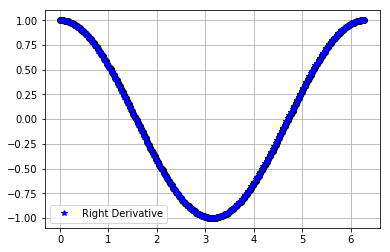

In [14]:
plt.plot(x,Dye,'ko')
plt.plot(x,Dyr,'b*', label='Right Derivative')
plt.grid()
plt.legend()

In [15]:
def LeftDerivative(f,x,h):
    
    d = 0.
    
    if( h!=0):
        d = (f(x)-f(x-h))/h
        
    return d

In [16]:
Dyl = LeftDerivative(Function,x,h)

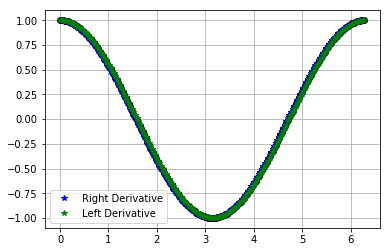

In [17]:
plt.plot(x,Dye,'ko')
plt.plot(x,Dyr,'b*', label='Right Derivative')
plt.plot(x,Dyl,'g*', label='Left Derivative')
plt.grid()
plt.legend()

In [18]:
def CentralDerivative(f,x,h):
    
    d = 0.
    
    if( h!=0):
        d = (f(x+h)-f(x-h))/(2.*h)
        
    return d

In [19]:
Dyc = CentralDerivative(Function,x,h)

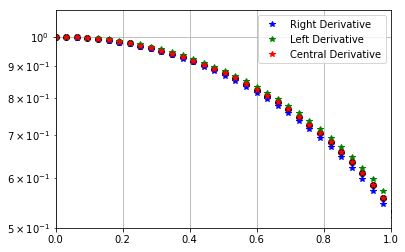

In [20]:
plt.plot(x,Dye,'ko')
plt.plot(x,Dyr,'b*', label='Right Derivative')
plt.plot(x,Dyl,'g*', label='Left Derivative')
plt.plot(x,Dyc,'r*', label='Central Derivative')
plt.grid()
plt.xlim(0.,1.)
plt.ylim(0.5,1.1)
plt.yscale('log')
plt.legend()

# Calculo de error local

In [21]:
ErrorL = np.abs(Dye-Dyl)
ErrorR = np.abs(Dye-Dyr)
ErrorC = np.abs(Dye-Dyc)

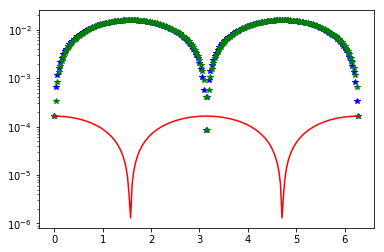

In [22]:
plt.plot(x,ErrorR,'b*',label='Right Derivative')
plt.plot(x,ErrorL,'g*',label='Left Derivative')
plt.plot(x,ErrorC,'r-',label='Central Derivative' )
plt.yscale('log')

# Calculo de error global

In [23]:
Sum_num = 0.
Sum_den = 0.

Array = ErrorC[:]

for i in range( len(Array) ):
    
    Sum_num += Array[i]**2
    Sum_den += Dye[i]**2
    
ErrorGlobal = np.sqrt(Sum_num/Sum_den)
print(ErrorGlobal)

0.0001644852894554908


# Segunda Derivada

In [24]:
def SecondDerivative(f,x,h):
    
    d2 = 0.
    
    if (h!=0):
        d2 = ( f(x+h)-2.*f(x)+f(x-h) )/h**2
        
    return d2

In [25]:
D2y = SecondDerivative(Function,x,h)

D2ye = -np.sin(x)

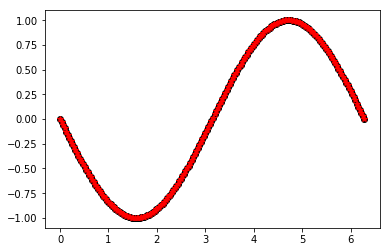

In [26]:
plt.plot(x,D2ye,'ko')
plt.plot(x,D2y,'r*')

In [27]:
ErrorD2C = np.abs(D2ye-D2y)

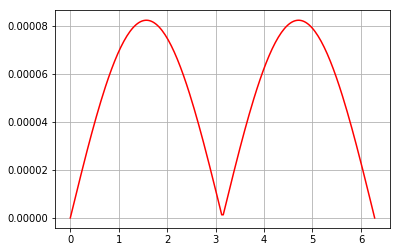

In [28]:
plt.plot(x, ErrorD2C, 'r-')
plt.grid()